- Look for Bid-ask spread and how are different asset types interact with these spreads. Most likely, that battery assets use spread trading strategy.

- Look how does the pricing change from long-ahead -> day-ahead -> intraday markets. A starting point for trend or technical indicator ??

From Modo Energy's head (Quentein) in the redefining energy broadcast: 
- Batteries are saturated in the frequency services as there is more supply than demand.
- Batteries are earing revenues throught the wholesale trade market.
- Are there big market participiants who influence the overall trading. It is possible they influence long or short trends in the market.

Different markets:
1. **Frequency response:** price forecasting for DC, DR, DM, used to have good revenue potentinal but now reducing
2. **Wholesale Market Arbitrage:** 
3. **Balancing Mechanism**
4. **Capacity market**
5. **Local Flexibility Market**


In [8]:
def standardize_neso_columns_name(original_columns: list):
    '''Returns standardized columns name of NESO data'''
    modified_columns = [col.lstrip('_').lower().replace(' ', '_').replace('/', '') for col in original_columns]
    return modified_columns


def standardize_elexon_columns_name(original_columns: list):
    '''modifies column names from DemandForecast -> demand_forecast'''
    modified_columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', col).lower() for col in original_columns]
    return modified_columns

In [6]:
import requests
import pandas as pd
import re


**Market Index Price**

- historical data for maximum of seven days at settlement levels by two data providers (though one's data is always showing zero)

In [9]:
# Market index price for the dates inclusive with maximum of seven days 
# Data Providers: N2EX ("N2EXMIDP") and APX ("APXMIDP") but N2EX data has all zeros
market_index_url = 'https://data.elexon.co.uk/bmrs/api/v1/balancing/pricing/market-index'
# Define parameters for the request
params = {
      'from': '2025-01-19', 
      'to': '2025-01-25',
      'settlementPeriodFrom': 1,
      'settlementPeriodTo': 48}
response = requests.get(market_index_url, params=params)

# Check if the request was successful
if response.status_code == 200:
    response_json = response.json()
    df = pd.DataFrame(response_json['data'])# If using JSON response
else:
    print("Error:", response.status_code, response.text)
df.columns = standardize_elexon_columns_name(df.columns)
df.set_index('start_time', inplace = True)
df.sort_index(inplace = True)
df.index.min(), df.index.max()

('2025-01-19T00:00:00Z', '2025-01-25T23:30:00Z')

In [11]:
df.head()

,data_provider,settlement_date,settlement_period,price,volume
start_time,,,,,
2025-01-19T00:00:00Z,N2EXMIDP,2025-01-19,1,0.00,0.00
2025-01-19T00:00:00Z,APXMIDP,2025-01-19,1,92.46,1674.75
2025-01-19T00:30:00Z,APXMIDP,2025-01-19,2,102.44,1483.35
2025-01-19T00:30:00Z,N2EXMIDP,2025-01-19,2,0.00,0.00
2025-01-19T01:00:00Z,APXMIDP,2025-01-19,3,112.22,1826.40


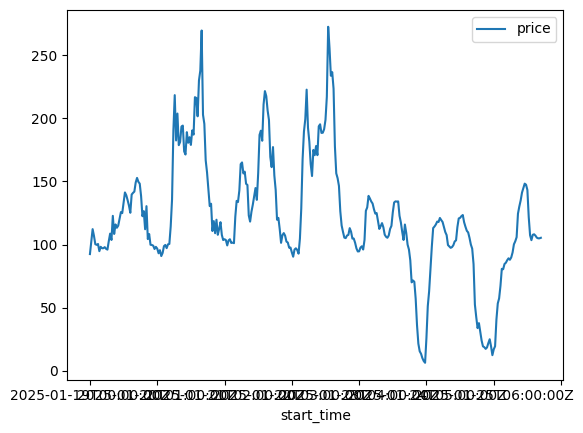

In [10]:
df[df.data_provider == 'APXMIDP'][['price']].plot();

**Indicative generation, demand, margin, imbalance**

In [38]:
# Market index price for the dates inclusive with maximum of seven days 
# Data Providers: N2EX ("N2EXMIDP") and APX ("APXMIDP") but N2EX data has all zeros
market_index_url = 'https://data.elexon.co.uk/bmrs/api/v1/forecast/indicated/day-ahead'
# Define parameters for the request
params = {"dataset": "string",
          'settlementDate' : '2025-04-08', 
          'settlementPeriod': 1}
response = requests.get(market_index_url, params=params)

# Check if the request was successful
if response.status_code == 200:
    response_json = response.json()
    df = pd.DataFrame(response_json['data'])# If using JSON response
else:
    print("Error:", response.status_code, response.text)
df.columns = standardize_elexon_columns_name(df.columns)
df.set_index('start_time', inplace = True)
df.sort_index(inplace = True)
df.index.min(), df.index.max()

('2025-04-07T12:30:00Z', '2025-04-09T03:30:00Z')

In [44]:
def elexon_url_to_df(url:str, params: dir):
    response = requests.get(url, params=params)
    # Check if the request was successful
    if response.status_code == 200:
        response_json = response.json()
        df = pd.DataFrame(response_json['data'])# If using JSON response
        df.columns = standardize_elexon_columns_name(df.columns)
    else:
        print("Error:", response.status_code, response.text)
        df = pd.DataFrame()
    return df

In [45]:
index_params = {"dataset": "string",
          'settlementDate' : '2025-04-08', 
          'settlementPeriod': 1}
market_index_df = elexon_url_to_df(market_index_url, index_params)
market_index_df

,publish_time,start_time,settlement_date,settlement_period,boundary,indicated_generation,indicated_demand,indicated_margin,indicated_imbalance
0,2025-04-07T12:47:00Z,2025-04-07T13:00:00Z,2025-04-07,29,N,22454,-19375,44407,-47
1,2025-04-07T12:47:00Z,2025-04-07T13:30:00Z,2025-04-07,30,N,22651,-19379,44452,-13
2,2025-04-07T12:47:00Z,2025-04-07T14:00:00Z,2025-04-07,31,N,23475,-18922,44587,722
3,2025-04-07T12:47:00Z,2025-04-07T14:30:00Z,2025-04-07,32,N,24350,-19559,43651,581
4,2025-04-07T12:47:00Z,2025-04-07T15:00:00Z,2025-04-07,33,N,25922,-19289,42964,1526
...,...,...,...,...,...,...,...,...,...
73,2025-04-07T12:47:00Z,2025-04-09T01:30:00Z,2025-04-09,6,N,17174,-14551,36672,-6418
74,2025-04-07T12:47:00Z,2025-04-09T02:00:00Z,2025-04-09,7,N,17220,-14438,36903,-6158
75,2025-04-07T12:47:00Z,2025-04-09T02:30:00Z,2025-04-09,8,N,17285,-14292,37347,-5667
76,2025-04-07T12:47:00Z,2025-04-09T03:00:00Z,2025-04-09,9,N,17375,-14167,37500,-5425


In [43]:
market_index_df

,publishTime,startTime,settlementDate,settlementPeriod,boundary,indicatedGeneration,indicatedDemand,indicatedMargin,indicatedImbalance
0,2025-04-07T12:47:00Z,2025-04-07T13:00:00Z,2025-04-07,29,N,22454,-19375,44407,-47
1,2025-04-07T12:47:00Z,2025-04-07T13:30:00Z,2025-04-07,30,N,22651,-19379,44452,-13
2,2025-04-07T12:47:00Z,2025-04-07T14:00:00Z,2025-04-07,31,N,23475,-18922,44587,722
3,2025-04-07T12:47:00Z,2025-04-07T14:30:00Z,2025-04-07,32,N,24350,-19559,43651,581
4,2025-04-07T12:47:00Z,2025-04-07T15:00:00Z,2025-04-07,33,N,25922,-19289,42964,1526
...,...,...,...,...,...,...,...,...,...
73,2025-04-07T12:47:00Z,2025-04-09T01:30:00Z,2025-04-09,6,N,17174,-14551,36672,-6418
74,2025-04-07T12:47:00Z,2025-04-09T02:00:00Z,2025-04-09,7,N,17220,-14438,36903,-6158
75,2025-04-07T12:47:00Z,2025-04-09T02:30:00Z,2025-04-09,8,N,17285,-14292,37347,-5667
76,2025-04-07T12:47:00Z,2025-04-09T03:00:00Z,2025-04-09,9,N,17375,-14167,37500,-5425


In [ ]:
from scipy.optimize import linprog
# Maximize 3x1+2x2 but linprog only minimize. Therefore, objective functions coefficients are negative
c = [-3, -2] 

# Inequality constraints are presented in the form: Ax <= b
A = [[1, 1],    # x1 + x2 <= 4
     [-1, 0],   # x1 >= 2 will be converted into -x1 <= -2 
     [0, -1]]   # y >= 1 will be converted into -x2 <= -1 

b = [4, -2, -1]  # Right-hand side of the inequalities

# Bounds for each variable
x_bounds = (2, None)  # x1 >= 2
y_bounds = (1, None)  # x2 >= 1

# Call linprog to solve the linear program
result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')

# Display the results
print(f"Optimal value of x: {result.x[0]:.2f}")
print(f"Optimal value of y: {result.x[1]:.2f}")
print(f"Optimal value of the objective function: {-result.fun:.2f}")


Optimal value of x: 3.00
Optimal value of y: 1.00
Optimal value of the objective function: 11.00


In [4]:
help(scipy.optimize)

NameError: name 'scipy' is not defined